


# Data-Flix (Group C)


- Ricky Dindial - 816022023
- Celeste Seegobin - 816019646
- Christine Ramdhanie - 816018588
- Videsh Jagai - 816014860


In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from string import punctuation
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
from nltk import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from itertools import chain
import string
import re
from sklearn.metrics import recall_score, f1_score

## Reading in the following csv file 

In [241]:
df= pd.read_csv('Netflix Shows.csv', encoding =('ISO-8859-1'),low_memory =False)

In [242]:
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


## Renaming the following column 

In [243]:
df.rename(columns={'ratingLevel': 'rating_level','release year':'release_year','user rating score':'user_rating_score','user rating size':'user_rating_size'},inplace=True)

In [244]:
df.shape

(1000, 7)

In [245]:
df.head()

,title,rating,rating_level,ratingDescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


### Information  of the folowing distinguish columns such as: rating_level , ratingDescription, release_year, ..

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   rating_level       941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release_year       1000 non-null   int64  
 5   user_rating_score  605 non-null    float64
 6   user_rating_size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [247]:
df.isnull().sum()

title                  0
rating                 0
rating_level          59
ratingDescription      0
release_year           0
user_rating_score    395
user_rating_size       0
dtype: int64

**From our deduction analysis in relation to the distinct columns (datatype fields:title,rating,rating_level,ratingDescription, release_year, user_rating_score, user_rating_size), noticeably that there are two fields columns that contains NULL values respectively:rating_level: 59, user_rating_score: 395.**  

## Replace missing values for the following columns columns:


In [248]:
df["user_rating_score"].fillna(0, inplace = True)

df["rating_level"].fillna("Unknown", inplace = True) 

## Removing Duplicates

In [249]:
df = df.drop_duplicates() 
df.duplicated().values.any()

False

## Confirming if Null Values were filled respectively.


In [250]:
df.isnull().sum()

title                0
rating               0
rating_level         0
ratingDescription    0
release_year         0
user_rating_score    0
user_rating_size     0
dtype: int64

#  Data Cleaning 


**When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques**

**With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results**

**Typical data cleaning prodecures on all according text:**

=> Make text all lower case

=> Remove punctuation

=> Remove numerical values

=> Remove common non-sensical text (/n)

=> Tokenize text

=> Remove stop words

In [251]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jagai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**The following preprocessing techniques/task showcases the cleaning of the follwoing datafield cloumn:rating_level as belowws showcases the conversion to lowercase in association with usages of the following libraries and method function {.join() and split()}**

In [252]:
df['lowercase'] = df['rating_level'].apply(lambda x: " ".join(word.lower() for word in x.split()))

**Then proceed to remove any punctuation by extension the following special characters accordingly**

In [253]:
df['punctuation'] = df['lowercase'].str.replace('[^\w\s]', '')

C:\Users\Jagai\AppData\Local\Temp/ipykernel_12300/4158296427.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['punctuation'] = df['lowercase'].str.replace('[^\w\s]', '')


## Filter out Stop Words 

- The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text.Most common stop words are as : most common words such as: “the“, “a“, and “is“. 

**Below is the folllowing removal of remoal of stopwords and inherently assigned to new datafield column review_content_clean wityh following usage of method function and libraries**

In [254]:
stop = stopwords.words('english')
df['review_content_clean'] = df['punctuation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,title,rating,rating_level,ratingDescription,release_year,user_rating_score,user_rating_size,lowercase,punctuation,review_content_clean
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,"crude and sexual humor, language and some drug...",crude and sexual humor language and some drug ...,crude sexual humor language drug content
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82,"strong violence, sexual content and adult lang...",strong violence sexual content and adult language,strong violence sexual content adult language
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,parents strongly cautioned. may be unsuitable ...,parents strongly cautioned may be unsuitable f...,parents strongly cautioned may unsuitable chil...
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,parents strongly cautioned. may be unsuitable ...,parents strongly cautioned may be unsuitable f...,parents strongly cautioned may unsuitable chil...
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,parental guidance suggested. may not be suitab...,parental guidance suggested may not be suitabl...,parental guidance suggested may suitable children


**Below is the follwoing dropping of the respective columns:**

In [255]:
cols = ['lowercase', 'punctuation']
df1 = df.drop(cols,axis=1)
df1.head()

,title,rating,rating_level,ratingDescription,release_year,user_rating_score,user_rating_size,review_content_clean
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,crude sexual humor language drug content
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82,strong violence sexual content adult language
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,parents strongly cautioned may unsuitable chil...
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,parents strongly cautioned may unsuitable chil...
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,parental guidance suggested may suitable children


**Overview description of our dataset in particular the amount of different shows in accordance, release years and different categorical ratings listed:(PG-13 , R , TV-14 , TV-PG) are some of the few listed respectively.**

In [256]:
print('There are {} different shows.\nAnd these shows in this years: {} \nThere are {} types of ratings.\nThese are: {}.\n  '.format(len(df1['title']),df1['release_year'].unique(),len(df1['rating'].unique()),df1['rating'].unique(),))

There are 500 different shows.
And these shows in this years: [2004 2006 2016 2008 2014 2013 2017 2015 2011 2009 2007 2012 2003 2001
 2010 1998 1999 1978 2005 1993 2002 1976 1989 1996 1997 2000 1994 1982
 1990 1940 1986 1995 1991 1992 1987] 
There are 13 types of ratings.
These are: ['PG-13' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-Y' 'NR' 'TV-Y7-FV' 'UR' 'PG'
 'TV-G' 'G' 'TV-Y7'].
  


#### Visualization

## Heatmaps show relationships and changes

**Used to view patterns and changes over time. Heatmap rectangles can be labeled with values of the color variable, which is useful only in cases where there are very few categories on the y-axis.**


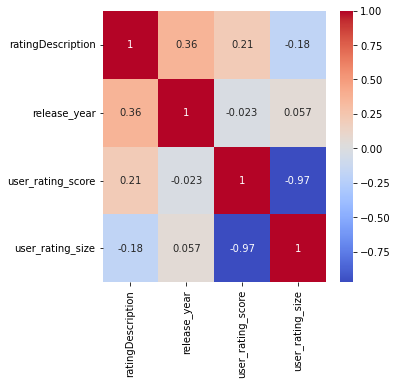

In [257]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df1.corr(), annot=True,linecolor="red",ax=ax,cmap='coolwarm')
plt.show()

**The following Diagram 1.0 above showcases the following according distribution/set of follwoing Netflix Shows, movies over the following period in which data was collected and the associated user_rating_score, user_rating_sizse, ratingDescription etc and the y-axis presents the  variable that defines the categories in the data.The rectangles are colored to show the magnitude of a third variable.**

## Release year

**Distribution of Following Netflix Distribution of TV shows**

The Year-wise distribution of Netflix shows


<AxesSubplot:title={'center':'Follwoing Years with the Corespoundings Netflix Movies and Shows'}>

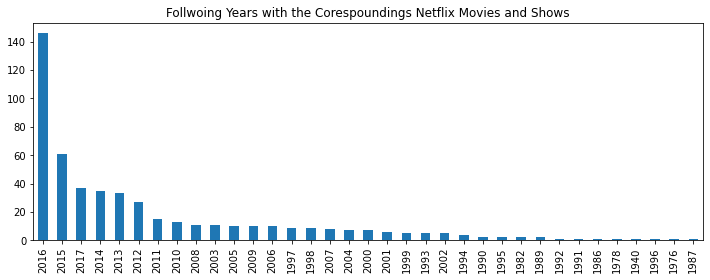

In [258]:
print("The Year-wise distribution of Netflix shows")
## SORTING BY ASCENDING ORDER;
year_no_of_shows=df1["release_year"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,4))
year_no_of_shows.plot(title='Follwoing Years with the Corespoundings Netflix Movies and Shows',kind="bar")

**The following diagram 2.0 showcases the follwoing distribution of the Netflix Movie and Shows whereby the its noticeably evident the gradula increase in the release of Netflix streamming shows respectively. As the last three  years showcases steep exponential increase from approximately 640 Netflix Shows in 2014 upwards to (> 140) Netflix shows respectively in 2017.**

C:\Users\Jagai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


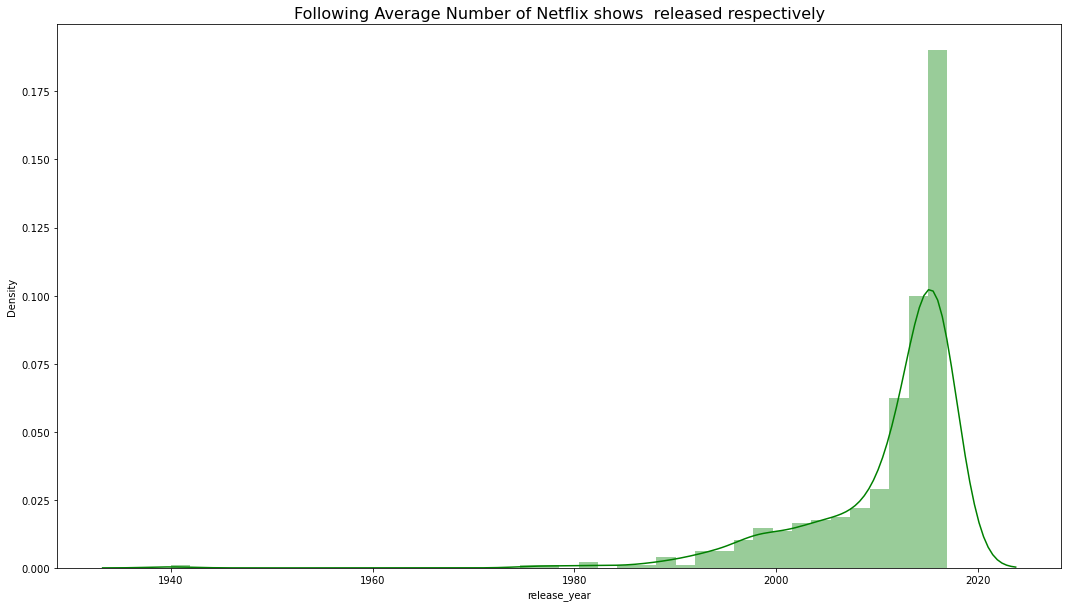

In [259]:
plt.figure(figsize=(18,10))
sns.distplot(df1['release_year'], bins=40, color='#008000')
plt.title('Following Average Number of Netflix shows  released respectively', fontsize=16)
plt.show()

**The diagram 3.0 expresses the following average number of Netflix Shows distributed over the years demarked by the relase years  respectively in coorelation as there is overwhelming density distribution from 2000s frm density distribution 2016(<0.075) onwards significant increase above(>0.175) in 2018**

## Ratings

**The distribution of Netflix shows generated in relation to rating**

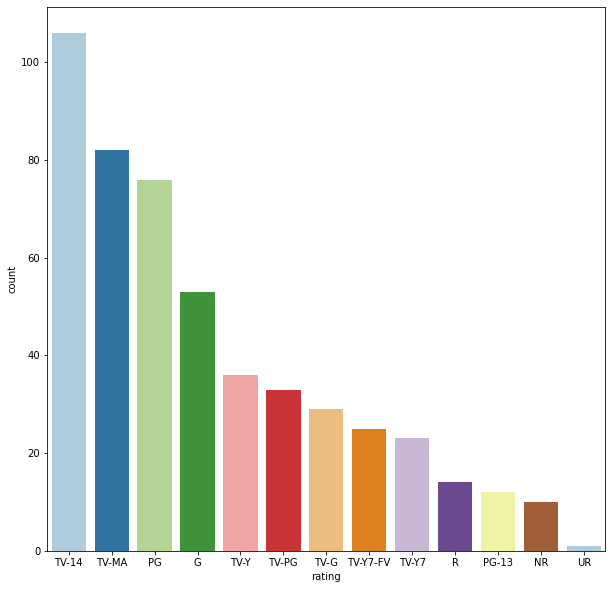

In [260]:
plt.figure(figsize=(10,10))
sns.countplot(x='rating',data=df1,order=df1['rating'].value_counts().index,palette='Paired')
plt.show()

**The diagram 4.0 above showcases the follwoing distribution of the Netflix rating over the release years period of viewership respectively.It must over(>100) Tv-14 leading next is TV-MA(>80) and afterwards PG(>70).**

In [261]:
freq_Distri = df1['rating'].value_counts()
print(freq_Distri)

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64


Text(0, 0.5, 'Number of Netflix Shows released')

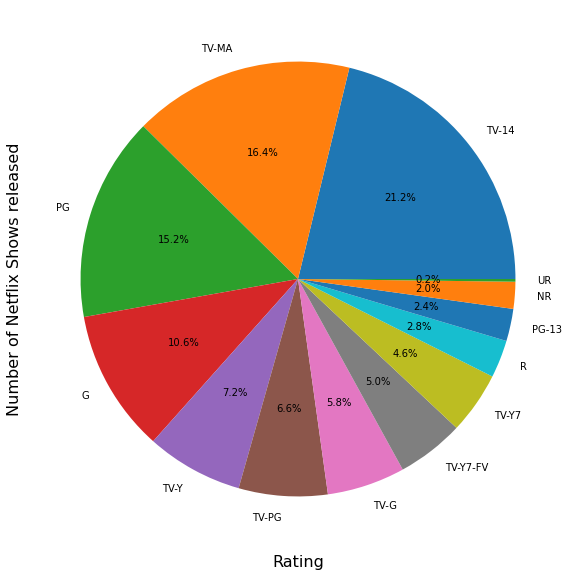

In [262]:
plt.figure(figsize=(18, 10))
freq_Distri.plot.pie(autopct="%.1f%%")
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Number of Netflix Shows released', fontsize=16)

**The diagram 5.0 showccases the % distrbution for the correspounding Netflix rating respectively whereby TV-14 : 21.2% and TV-MA 16.4%.**


In [263]:
Netfshows_Distri=df1.dropna()

NetfRat_L=list(Netfshows_Distri['rating'].unique())
Rating_MeanSc=[] # rating mean score
Rating_C=[] # Rating count

for i in NetfRat_L:
    x=Netfshows_Distri[Netfshows_Distri['rating']==i]
    
    Mean_Sc=sum(x.user_rating_score)/len(x)
    Rating_MeanSc.append(Mean_Sc)
    Rating_C.append(len(x))

In [264]:
Unsorted_Ratings_Data = pd.DataFrame({'rating':NetfRat_L,'mean_score':Rating_MeanSc,'rating_count':Rating_C})
sorted_Ratings_Data= Unsorted_Ratings_Data.sort_values(by='mean_score',ascending=False).reset_index(drop=True)
sorted_Ratings_Data.head()

,rating,mean_score,rating_count
0,TV-14,60.198113,106
1,PG-13,53.583333,12
2,TV-PG,53.333333,33
3,PG,53.118421,76
4,R,42.642857,14


**Rating Description**

<AxesSubplot:xlabel='ratingDescription', ylabel='count'>

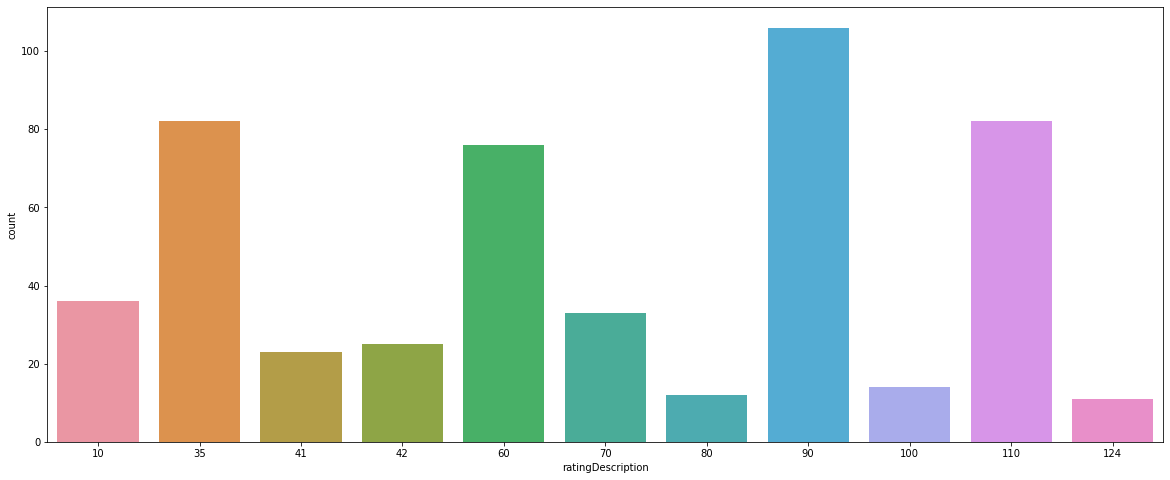

In [265]:
plt.figure(figsize=(20,8))
sns.countplot(x="ratingDescription", data=df1)

**The number of Netflix release over the years against the correspounding rating Description**

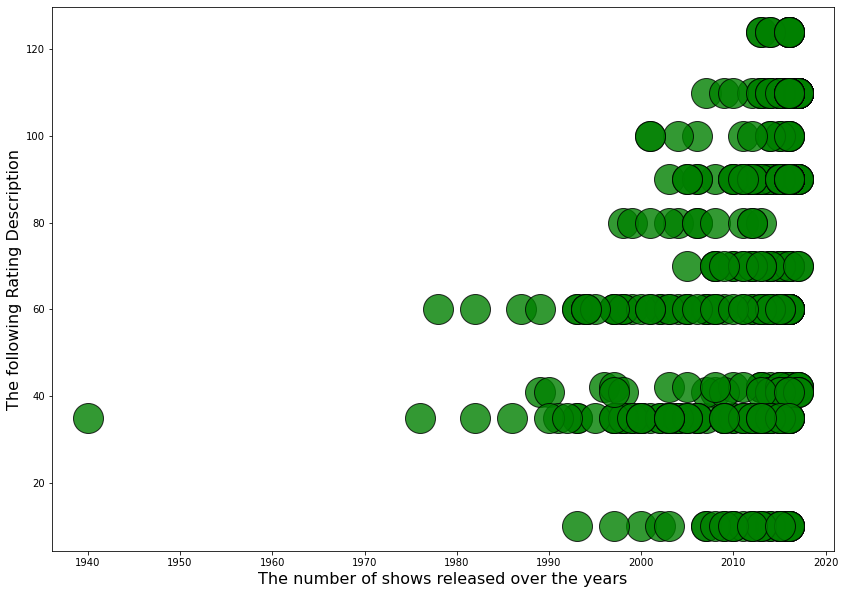

In [266]:
plt.figure(figsize=(14, 10))
L = pd.DataFrame(df, columns=['release_year'])
m = pd.DataFrame(df, columns=['ratingDescription'])
plt.xlabel('The number of shows released over the years',fontsize=16)
plt.ylabel('The following Rating Description',fontsize=16)
plt.scatter(L, m, s=900, alpha = 0.8,ec='black',color='#008000')
plt.show()

C:\Users\Jagai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


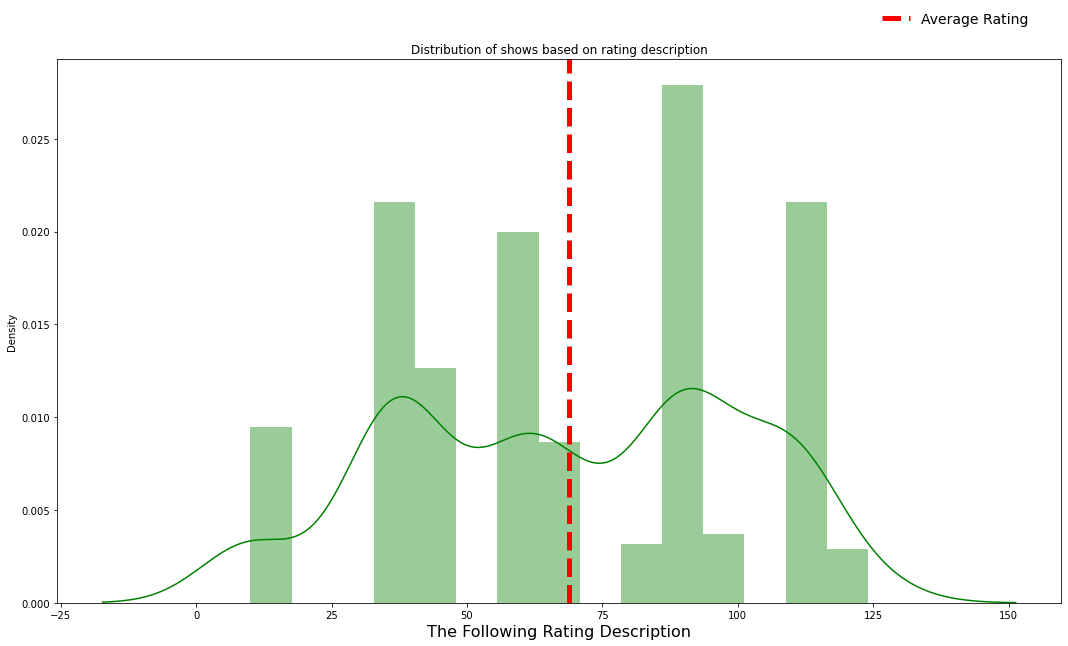

In [267]:
plt.figure(figsize=(18,10))
sns.distplot(df1['ratingDescription'], bins=15, color='#008000')
plt.xlabel('The Following Rating Description', fontsize=16)
plt.title('Distribution of shows based on rating description')

plt.axvline(df1['ratingDescription'].mean(), color='#FF0000', linestyle='dashed', linewidth=5, label='Average Rating')
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.11), frameon=False, fontsize=14)

**The following diagram 6.0 showcases the average rating based on the density rating description respectiverly whereby noticeable by red dotted line the average rating particular has modrately spread  in relation to the distribution of density rating description. Specficallythe average rating is between 65-75 on the x-axis.**

**User Rating Score**

<AxesSubplot:xlabel='user_rating_score', ylabel='count'>

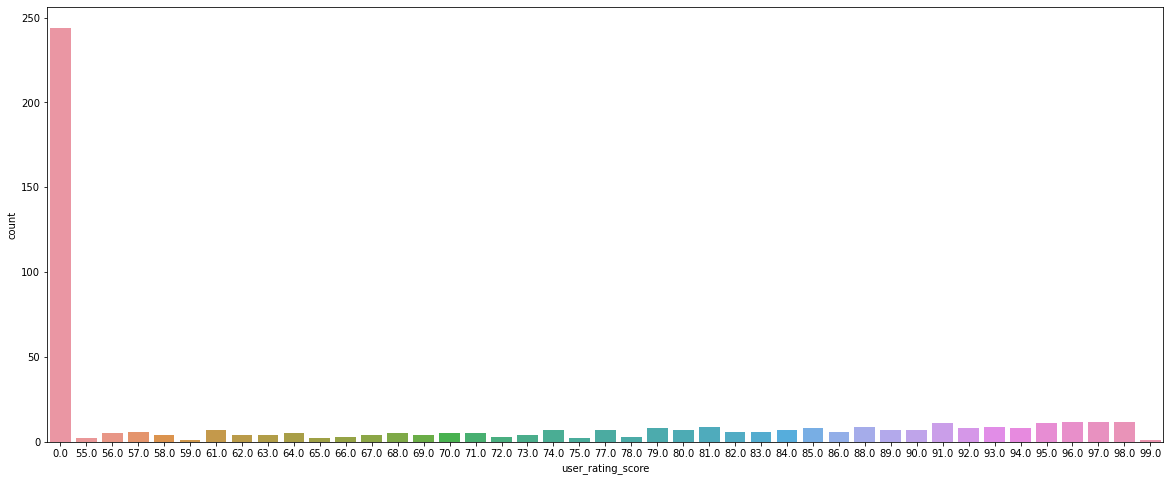

In [268]:
plt.figure(figsize=(20,8))
sns.countplot(x="user_rating_score", data=df1)

**The diagram 7.0 above showcases the following distribution of the user rating score**

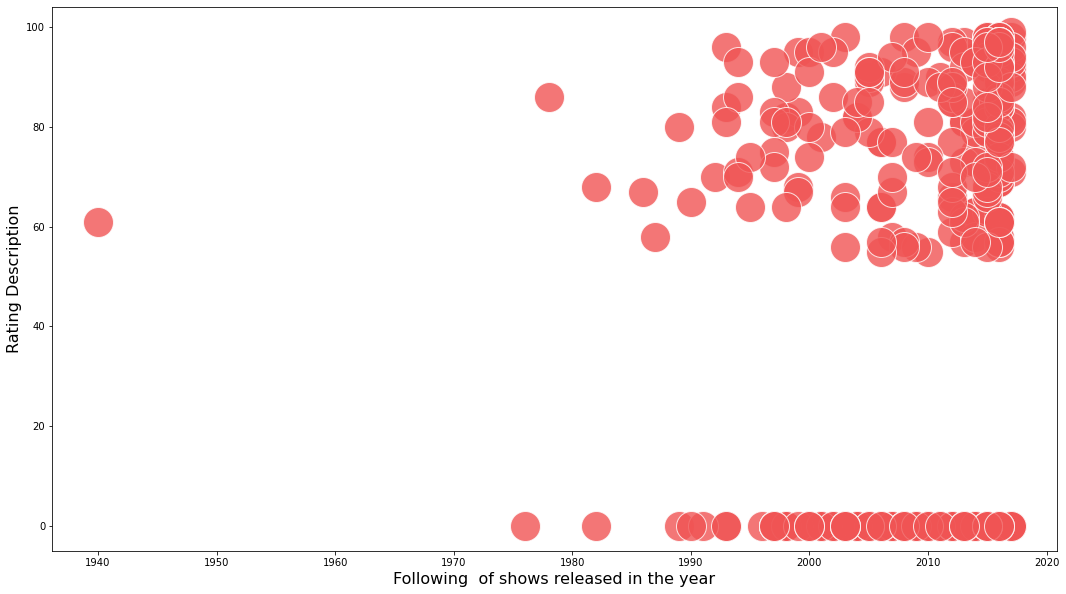

In [269]:
plt.figure(figsize=(18, 10))
L = pd.DataFrame(df1, columns=['release_year'])
m = pd.DataFrame(df1, columns=['user_rating_score'])
plt.xlabel('Following  of shows released in the year',fontsize=16)
plt.ylabel('Rating Description',fontsize=16)
plt.scatter(L, m, s=900, alpha = 0.8,ec='white',color='#f05454')
plt.show()

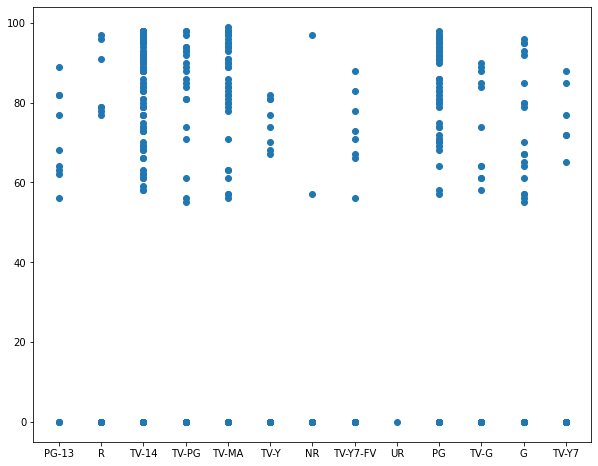

In [270]:
plt.figure(figsize=(10,8))
plt.scatter(df1['rating'],df1['user_rating_score'])

C:\Users\Jagai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


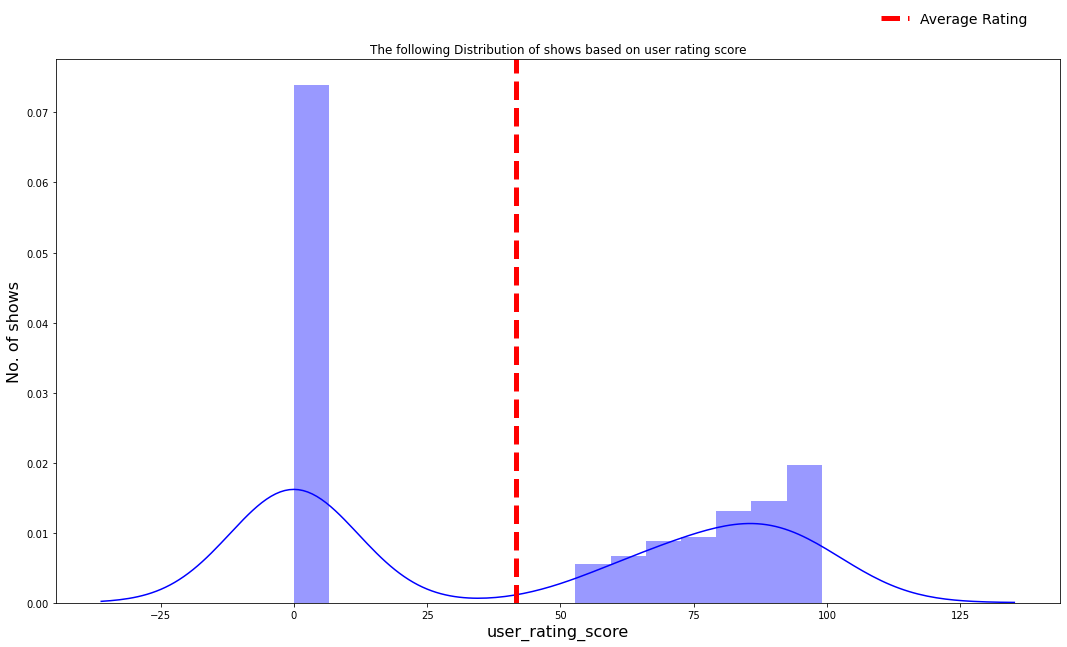

In [271]:
plt.figure(figsize=(18,10))
sns.distplot(df1['user_rating_score'], bins=15, color='#0000FF')
plt.xlabel('user_rating_score', fontsize=16)
plt.title('The following Distribution of shows based on user rating score')
plt.axvline(df1['user_rating_score'].mean(), color='#FF0000', linestyle='dashed', linewidth=5, label='Average Rating')
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.11), frameon=False, fontsize=14)

plt.ylabel('No. of shows', fontsize=16)
plt.show()

**The following diagram 8.0 showcases the average rating based on the density usewr rating score respectiverly whereby noticeable by red dotted line the average rating particular has sparse and inconsistent spread  in relation to the distribution of usewr rating score. Specficallythe average rating is between 35-50 on the x-axis.**

## Classification

**Once the text is processed the next step is to do the actual classification.There are many other popular classifiers that may perform better**

1.**Support Vector Machine and its variants**

2.**Naive Bayes and its variants**

3.**Random Forests and its variants**

**Metric Classification:** 

  - The confucion matrix helps to fundamentally identify how our prediction performane in addtion to how it  stands against for actual dataset. The confusion matrix is the epicentre  to further analysis of of the distinct classification metric (;e.g. accuracy,error rate).  The confusion matrix showcases ways in which any particular model is obscure/bewildered when it makes predictions relating to data findings/analysis. Hence, it is an effectively liable metric utlised accordingly.
 
 
 **N.B: Confusion Matrix:**

-  **Binary Classification: Model accepting the data and accordingly predicting it to either being true or False respectively.**

-  **In the case whereby it predicts False and actual value is False, therfore this is  desirable,however in the case whereby it predicts True when actual value is False is undesirable.**

-  **In the case whereby it predicts True abd actual value is True, therfore this is desirable, however in th case whereby it predicts False when actual value is True is undesirable.**

-   **Essentially we can dedeuce four classifications in which the prediction are under respectively. ** False negeative, Flase positive, True positive, True negeative: confusion matrix]**
  
  **N.B: Recall**
  
 
  - **Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).**
  
  - **Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.**
  

#### Text Classification

In [197]:
perf = []

In [272]:
X = df1["review_content_clean"]
y = df1['ratingDescription']

In [273]:
def text_fit(perf,X, y, model,clf_model,coef_show=1,):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    perf.append(recall*100)
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [274]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))

In [275]:
X1 = []
for i in X:
    X1.append(listToString(i))

X1

['c r u d e   s e x u a l   h u m o r   l a n g u a g e   d r u g   c o n t e n t',
 's t r o n g   v i o l e n c e   s e x u a l   c o n t e n t   a d u l t   l a n g u a g e',
 'p a r e n t s   s t r o n g l y   c a u t i o n e d   m a y   u n s u i t a b l e   c h i l d r e n   a g e s   1 4',
 'p a r e n t s   s t r o n g l y   c a u t i o n e d   m a y   u n s u i t a b l e   c h i l d r e n   a g e s   1 4',
 'p a r e n t a l   g u i d a n c e   s u g g e s t e d   m a y   s u i t a b l e   c h i l d r e n',
 'p a r e n t s   s t r o n g l y   c a u t i o n e d   m a y   u n s u i t a b l e   c h i l d r e n   a g e s   1 4',
 'm a t u r e   a u d i e n c e s   m a y   s u i t a b l e   c h i l d r e n   1 7',
 'p a r e n t s   s t r o n g l y   c a u t i o n e d   m a y   u n s u i t a b l e   c h i l d r e n   a g e s   1 4',
 'm a t u r e   a u d i e n c e s   m a y   s u i t a b l e   c h i l d r e n   1 7',
 'p a r e n t s   s t r o n g l y   c a u t i o n e d   m a y   u n 

In [276]:
import sys
print(sys.executable)

C:\Users\Jagai\anaconda3\python.exe


In [203]:
from wordcloud import WordCloud, STOPWORDS

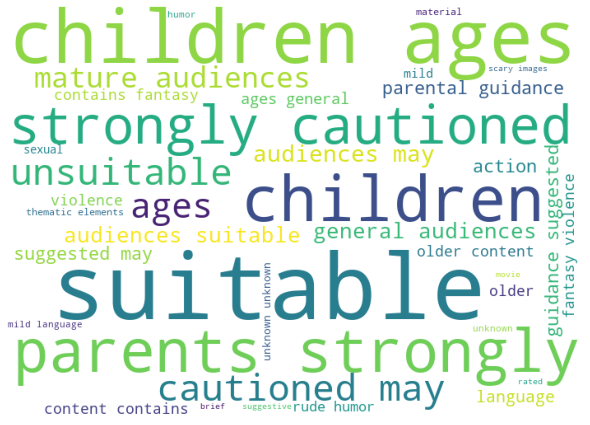

In [277]:
comment_words = '' 
stopwords = set(STOPWORDS) 
   
for val in df1.rating_level[:]: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 700, height = 500, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**The following common words that is frequently present in  ratinglevel accordiongly**

## Logistic Regression Model

- Logistic regression is a linear model trained on labelled data — the term linear is important because it means the algorithm only uses linear combinations (i.e. sums and not products) of inputs and parameters to produce a class prediction.


**Independent Variable**


X: **Essentially we are extracting the associating ratingLevel   for each associating row and stored in X which paralells to in correspoundence to rating description**

**Dependent Variable**
y: **This would inherently interassociate with RatingLevel provided as it is dependent on the extent/degree for each respectiver Netflix Show**


- Logistic regression fits an “S” shaped “logistic” function whereby the curve goes/travels from 0 to 1. Therefore it showcases the relationship and thus its’ interrelations between the variables. Further analysis contributes to the accountability of deciding the classification based on our relationship generated for our data respectively.


**Advantages of Logistic Regression**

Logistic Regression is one of the most efficient technique for solving classification problems. Some of the advantages of using Logistic regression are as mentioned below.

•	**Logistic regression is easier to implement, interpret, and very efficient to train. It is very fast at classifying unknown records.**

•	**It performs well when the dataset is linearly separable.**

•	**It can interpret model coefficients as indicators of feature importance.**



In [278]:
def text_Log_R_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X) ## transform the data ( e.g.CountVectorizer and TfidfVectorizer ) into lower and stopwords respectively dentoed by X_c
    print('# FEATURES {}'.format(X_c.shape[1])) # Display the features generated with the above intial conversion...
    
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0) #train_test_split function Split a dataset (A abd B) into two distinct dataset (random train model: X_train)and (test  model X_test)
    # Futher manipulation,specify the representation of the proportion of the representation of the data saet to include in the train split.
    
    # X_tarin and  y_train data for training the model in addition X_test and y_test; to evaluate the performance of model
    print('# TRAIN RECORDS: {}'.format(X_train.shape[0]))
    print('# TEST RECORDS: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train) # Fit logistic regression model  with X_train and y_train and then predicxt X_test
    
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred,average='micro') # compute the recall score between the actual prediction and what wahat weas predict from the model
                        
    print ('MODEL RECALL {}'.format(recall))
    
    if coef_show == 1: 
        print(confusion_matrix(y_test,y_pred))
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'WORD' : w, 'COEFFICIENT' : coef})
        coeff_df = coeff_df.sort_values(['COEFFICIENT', 'WORD'], ascending=[0, 1])
        
        print('')
        print('-The Top 20 positive respectively-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-The Top 20 negative respectively-')        
        print(coeff_df.tail(20).to_string(index=False))

In [279]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [280]:
c = CountVectorizer(stop_words = 'english')
text_Log_R_fit(X, y, c, LogisticRegression())

# FEATURES 98
# TRAIN RECORDS: 375
# TEST RECORDS: 125
MODEL RECALL 0.808
[[14  0  0  0  0  0  0  0  0  0  0]
 [11 10  0  0  0  0  0  0  0  1  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  1  1  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 20  1  0  0]
 [ 0  0  0  0  1  0  2  0  2  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  1  2]]

-The Top 20 positive respectively-
         WORD  COEFFICIENT
         ages     1.617719
     suitable     1.435606
     creature     0.000000
     innuendo     0.000000
          mld     0.000000
   restricted     0.000000
   situations     0.000000
     perilous    -0.000261
     animated    -0.001130
      cartoon    -0.001130
     menacing    -0.001290
      gunplay    -0.001898
       sports    -0.003415
       hockey    -0.003747
        rough    -0.003747
    slapstick    -0.003920
      graphic    -0.004101
       

## Assesement from our Logistic regression model on Word Count

- After execution of the CountVectorizer, generated quite alot of features (:98) in our bag of words. Therfore 98 unique words within our corpus.respectively, following train records generated 375 and test records: 125. 



- Our Model Recall: 0.808** which is fair considereing our positive and negeative sentiment list.However therte are few exception within our positive sentiment list (words: ages,situations ,gunplay,cartoon,inappropriate ) are susceptibly brought within the list but is relatively fair performance.




 - **tfidf and the TfidfVectorizer is much effective than the  CountVectorizer because it focuses on the frequency of words in addition it also provides a relationship into the  critical importance of words , hence filtering the unimportant/ibnsignificant words present.**

In [281]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_Log_R_fit(X, y,tfidf, LogisticRegression())

# FEATURES 98
# TRAIN RECORDS: 375
# TEST RECORDS: 125
MODEL RECALL 0.808
[[14  0  0  0  0  0  0  0  0  0  0]
 [11 10  0  0  0  0  0  0  0  1  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  1  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0 20  0  0  0]
 [ 0  0  0  0  5  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  1  2]]

-The Top 20 positive respectively-
      WORD  COEFFICIENT
      ages     2.489265
  suitable     2.365510
  creature     0.000000
  innuendo     0.000000
       mld     0.000000
restricted     0.000000
situations     0.000000
  perilous    -0.002901
  animated    -0.005207
   cartoon    -0.005207
  menacing    -0.005634
   gunplay    -0.005800
    sports    -0.006685
   moments    -0.007057
    hockey    -0.007534
     rough    -0.007534
 slapstick    -0.007590
     scifi    -0.007963
sexrelated    -0.008425
 momentary   

In [282]:
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif
def text_Log_R_fit2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)## transform the data ( e.g.CountVectorizer and TfidfVectorizer ) into lower and stopwords respectively dentoed by X
    #FEATURES BEFORE APPLYING SELECT PERCENTILE
    print('# FEATURES BEFORE APPLYING SELECT PERCENTILE: {}'.format(X_c.shape[1]))
    #class sklearn.feature_selection.SelectPercentile(score_func=<function f_classif>, *, percentile=10) [ Default is f_classif (see below “See Also”). The default function only works with classification tasks. ]
    select_percentile = SelectPercentile(f_classif, select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    #fEATURES AFTER APPLYING SELECT PERCENTILE
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    # X_tarin and  y_train data for training the model in addition X_test and y_test; to evaluate the performance of model
    print('# TRAIN RECORDS: {}'.format(X_train.shape[0]))
    print('# TEST RECORDS: {}'.format(X_test.shape[0]))
    
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
     # compute the recall score between the actual prediction and what wahat weas predict from the model
    recall = recall_score(y_test,y_pred,average='micro')
    
    print ('MODEL RECALL: {}'.format(recall))
    if coef_show == 1:
        print(confusion_matrix(y_test,y_pred))
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'WORD' : w, 'COEFFICIENT' : coef})
        coeff_df = coeff_df.sort_values(['COEFFICIENT', 'WORD'], ascending=[0, 1])
        
        print('')
        print('-Top 20 positive respectively-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative respectively-')        
        print(coeff_df.tail(20).to_string(index=False))

In [283]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_Log_R_fit2(X, y, tfidf_n, LogisticRegression(), 50, 1)

# FEATURES BEFORE APPLYING SELECT PERCENTILE: 294
# features after applying select percentile: 147
# TRAIN RECORDS: 375
# TEST RECORDS: 125
MODEL RECALL: 0.8
[[14  0  0  0  0  0  0  0  0  0  0]
 [11 10  0  0  0  0  0  0  0  1  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  1  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0 20  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  1  2]]

-Top 20 positive respectively-
                   WORD  COEFFICIENT
      images suggestive     2.743888
               children     1.635567
           gunplay mild     1.566164
             brief rude     0.000000
           comic action     0.000000
               elements     0.000000
    fantasy actionperil     0.000000
         intense action     0.000000
              involving     0.000000
              momentary     0.000000
      

C:\Users\Jagai\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass percentile=50 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Assesement from our Logistic regression model on TFIDF + ngram

- From the above assessment of Logistic regression model, Before applying selectPercentile features amounted to 294, however after applying select percentile (50%) featuerews 147, inddition our model recall is 0.8** is slim decrease from the intial beginning of our execution of performance of classfication task (Logistic regression on word count ; Model Recall: 0.808** ) . THherefore by reducing the size by half(:50%) , the model recall has had any minor influenical impact on  adjustments respectively. 




## Support Vector Machines



- Support Vector Machine is a discriminative classifier that is formally designed by a separative hyperplane. It is representation of examples as points in space that are mapped so that the points of different categories are separated by a gap wide as possible.


-  The use of “kernel functions”, i.e. functions that transform a complex, nonlinear decision space to one that has higher dimensionality, so that an appropriate hyperplane separating the data points can be found.



- The SVM classifier looks to maximize the distance of each data point from this hyperplane using “support vectors” that characterize each distance as a vector.


- The SVMs uses a hinge loss rather than a logistic loss, hence this contributes to generating more influencial to outliers in our dataset. 


## LinearSVC 

**The use of linearSVC is primarily due to our implementation of our function text_SVM__fit function specfically our coeoff_ which is subsequebntly made avilable only for linear kernel**

- LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.


- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.


- LineareSVC, is another (faster) implementation of Support Vector Classification for the case of a linear kernel. LinearSVC does not accept parameter kernel, as this is assumed to be linear

In [284]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
def text_SVM__fit(X, y, model, clf_model, coef_show=1):
    # model = StandardScaler()
    X_c = model.fit_transform(X) ## transform the data ( e.g.CountVectorizer and TfidfVectorizer ) into lower and stopwords respectively dentoed by X_c
    # X = StandardScaler().fit_transform(A) 
    print('# FEATURES: {}'.format(X_c.shape[1])) # Display the features generated with the above intial conversion...
    
    X_train, X_test, y_train, y_test = train_test_split(X_c,y, random_state=0) #train_test_split function Split a dataset (A abd B) into two distinct dataset (random train model: X_train)and (test  model X_test)
    # Futher manipulation,specify the representation of the proportion of the representation of the data saet to include in the train split.
    
    print('# TRAIN RECORDS: {}'.format(X_train.shape[0]))# X_tarin and  y_train data for training the model in addition X_test and y_test; to evaluate the performance of model
    print('# test records: {}'.format(X_test.shape[0]))
    
    clf_model = LinearSVC() ## DUE to our Coef_ {Coefficient is only avaliable when utilising a linear kernel}]
    ##Coef_[Coefficient is accordingly  =1,then following can retrieve the following positive and negeative words.
    clf = clf_model.fit(X_train, y_train) # Fit logistic regression model  with X_train and y_train and then predicxt X_test
    # =classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    recall = recall_score(y_test,y_pred,average='micro') # compute the recall score between the actual prediction and what wahat weas predict from the model
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1: 
        print(confusion_matrix(y_test,y_pred))
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [285]:
c = CountVectorizer(stop_words = 'english')
text_SVM__fit(X, y, c, SVC())

# FEATURES: 98
# TRAIN RECORDS: 375
# test records: 125
Model Recall: 0.816
[[14  0  0  0  0  0  0  0  0  0  0]
 [11 10  0  0  0  0  0  0  0  1  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  1  1  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0 20  1  0  0]
 [ 0  0  0  0  1  0  1  0  3  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  1  2]]

-Top 20 positive-
         Word  Coefficient
         ages 4.344900e-01
     suitable 4.246600e-01
     contains 1.951564e-18
    pervasive 4.336809e-19
           13 0.000000e+00
           17 0.000000e+00
     accident 0.000000e+00
        adult 0.000000e+00
       adults 0.000000e+00
     animated 0.000000e+00
       bloody 0.000000e+00
      cartoon 0.000000e+00
        comic 0.000000e+00
      contain 0.000000e+00
     creature 0.000000e+00
        drugs 0.000000e+00
      graphic 0.000000e+00
      gunplay 0.000000

## Assessment from our Support Vector Model on WORD COUNT

- After execution of the CountVectorizer, generated quite alot of features (:98) in our bag of words. Therfore 19906 unique words within our corpus.respectively, following train records generated 375 and test records: 125. 

-

- Our Model Recall: 0.816**  which is fair considereing our positive and negeative sentiment list.However therte are few exception within our positive sentiment list (words: suitable,drugs,graphics, gunplay) are susceptibly brought within the list but is relatively fair performance.

In [286]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_SVM__fit(X, y, tfidf, SVC())

# FEATURES: 98
# TRAIN RECORDS: 375
# test records: 125
Model Recall: 0.816
[[14  0  0  0  0  0  0  0  0  0  0]
 [11 10  0  0  0  0  0  0  0  1  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  1  1  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 20  1  0  0]
 [ 0  0  0  0  1  0  2  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  1  2]]

-Top 20 positive-
         Word   Coefficient
         ages  7.085488e-01
     suitable  7.063946e-01
     animated  4.336809e-19
      cartoon  4.336809e-19
      gunplay  2.168404e-19
           13  0.000000e+00
     creature  0.000000e+00
inappropriate  0.000000e+00
     innuendo  0.000000e+00
          mld  0.000000e+00
     perilous  0.000000e+00
   restricted  0.000000e+00
   situations  0.000000e+00
     menacing -2.168404e-19
           17 -6.938894e-18
    slapstick -4.286280e-03
      graphic -4.662563e-03
    

## Assessment from our Support Vector Model on TFIDF 

- After execution of the CountVectorizer, generated quite alot of features (:98) in our bag of words. Therfore 98 unique words within our corpus.respectively, following train records generated 375 and test records: 125.

In [287]:
def text_SVM_fit2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)## transform the data ( e.g.CountVectorizer and TfidfVectorizer ) into lower and stopwords respectively dentoed by X
    #FEATURES BEFORE APPLYING SELECT PERCENTILE
    print('# FEATURES BEFORE APPLYING SELECT PERCENTILE: {}'.format(X_c.shape[1]))
    #class sklearn.feature_selection.SelectPercentile(score_func=<function f_classif>, *, percentile=10) [ Default is f_classif (see below “See Also”). The default function only works with classification tasks. ]
    select_percentile = SelectPercentile(f_classif, select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    #fEATURES AFTER APPLYING SELECT PERCENTILE
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    
    # X_tarin and  y_train data for training the model in addition X_test and y_test; to evaluate the performance of model
    print('# TRAIN RECORDS: {}'.format(X_train.shape[0]))
    print('# TEST RECORDS: {}'.format(X_test.shape[0]))
    
    clf_model = LinearSVC()##
    
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
     # compute the recall score between the actual prediction and what wahat weas predict from the model
    recall = recall_score(y_test,y_pred,average='micro')
    
    print ('MODEL RECALL: {}'.format(recall))
    if coef_show == 1:
        print(confusion_matrix(y_test,y_pred))
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'WORD' : w, 'COEFFICIENT' : coef})
        coeff_df = coeff_df.sort_values(['COEFFICIENT', 'WORD'], ascending=[0, 1])
        
        print('')
        print('-Top 20 positive respectively-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative respectively-')        
        print(coeff_df.tail(20).to_string(index=False))

In [288]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_SVM_fit2(X, y, tfidf_n, SVC(), 50, 1)

# FEATURES BEFORE APPLYING SELECT PERCENTILE: 294
# features after applying select percentile: 147
# TRAIN RECORDS: 375
# TEST RECORDS: 125
MODEL RECALL: 0.808
[[14  0  0  0  0  0  0  0  0  0  0]
 [11 10  0  0  0  0  0  0  0  1  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  1 13  1  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0 20  0  0  0]
 [ 0  0  0  0  4  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  1  2]]

-Top 20 positive respectively-
               WORD   COEFFICIENT
  images suggestive  8.143101e-01
           children  4.523586e-01
       gunplay mild  4.495164e-01
         brief rude  0.000000e+00
       comic action  0.000000e+00
           elements  0.000000e+00
fantasy actionperil  0.000000e+00
              humor  0.000000e+00
     intense action  0.000000e+00
          involving  0.000000e+00
language suggestive  0.000000e+00
   

C:\Users\Jagai\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass percentile=50 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### Topic Modelling

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a **set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions** that best characterize a set of documents.

Non Negative Matrix Factorization (NMF), Latent Dirichlet Allocation (LDA) and Single Value Decomposition (SVD) algorithms will be used to find topics in a document collection. The output of the derived topics involved assigning a numeric label to the topic and printing out the top words in a topic


In [289]:
def Dis_Top(L, F, feature_N, Docs, no_top_words, Num_Top_Doc):
    for topic_idx, topic in enumerate(L):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_N[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_Doc_Ind = np.argsort( F[:,topic_idx] )[::-1][0:Num_Top_Doc]
        for doc_index in top_Doc_Ind:
            print(Docs[doc_index])
            print("\n")

In [290]:
Docs = list(X)[0:10000]
print(len(Docs))

500


## Topic modelling algorithm

**Non Negative Matrix Factorization**

- **NMF is able to use tf-idf**

In [291]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(Docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [292]:
num_topics = 5

In [293]:
# Run NMF
nmf_model = NMF(n_components= num_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_L = nmf_model.transform(tfidf)
nmf_F = nmf_model.components_

In [294]:
no_top_words = 10
Num_Top_Doc = 2
print("NMF Topics \n\n")
Dis_Top(nmf_L, nmf_F, tfidf_feature_names, Docs, no_top_words, Num_Top_Doc)

NMF Topics 


Topic 0:
14 adult actionperil action 17


strong violence sexual content adult language


parental guidance suggested may suitable children


Topic 1:
14 adult actionperil action 17


parents strongly cautioned may unsuitable children ages 14


parental guidance suggested may suitable children


Topic 2:
17 adult actionperil action 14


parental guidance suggested may suitable children


parents strongly cautioned may unsuitable children ages 14


Topic 3:
17 adult actionperil action 14


parental guidance suggested may suitable children


parents strongly cautioned may unsuitable children ages 14


Topic 4:
actionperil adult action 17 14


parental guidance suggested may suitable children


parents strongly cautioned may unsuitable children ages 14


Topic 5:
17 adult actionperil action 14


crude sexual humor language drug content


strong violence sexual content adult language


Topic 6:
action actionperil adult 17 14


parental guidance suggested may suitable children

IndexError: index 60 is out of bounds for axis 1 with size 60

-  **LDA can only use raw term counts for LDA because it is a probabilistic graphical model**

In [295]:

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(Docs)
tf_feature_names = tf_vectorizer.get_feature_names()

In [296]:
# Executing  LDA
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_L = lda_model.transform(tf)
lda_F = lda_model.components_

In [297]:
print("\n\nLDA Topics \n\n")
Dis_Top(lda_L, lda_F, tf_feature_names, Docs, no_top_words, Num_Top_Doc)



LDA Topics 


Topic 0:
actionperil action adult 14 17


crude sexual humor language drug content


strong violence sexual content adult language


Topic 1:
actionperil action adult 17 14


strong violence sexual content adult language


crude sexual humor language drug content


Topic 2:
14 17 adult actionperil action


parents strongly cautioned may unsuitable children ages 14


parental guidance suggested may suitable children


Topic 3:
14 17 adult actionperil action


parents strongly cautioned may unsuitable children ages 14


parents strongly cautioned may unsuitable children ages 14


Topic 4:
17 14 adult actionperil action


parents strongly cautioned may unsuitable children ages 14


parents strongly cautioned may unsuitable children ages 14


Topic 5:
14 17 adult actionperil action


strong violence sexual content adult language


crude sexual humor language drug content


Topic 6:
17 14 adult actionperil action


parental guidance suggested may suitable children


parents 

IndexError: index 60 is out of bounds for axis 1 with size 60

- **SVD**

In [298]:

lsi_model =TruncatedSVD(n_components=num_topics, n_iter=7, random_state=42).fit(tf)
lsi_L = lsi_model.transform(tf)
lsi_F = lsi_model.components_

In [299]:
print("\n\nLSI Topics \n\n")
Dis_Top(lsi_L, lsi_F, tf_feature_names, Docs, no_top_words, Num_Top_Doc)



LSI Topics 


Topic 0:
adult actionperil action 17 14


crude sexual humor language drug content


parental guidance suggested may suitable children


Topic 1:
adult actionperil action 17 14


parental guidance suggested may suitable children


strong violence sexual content adult language


Topic 2:
14 adult actionperil action 17


parental guidance suggested may suitable children


parents strongly cautioned may unsuitable children ages 14


Topic 3:
14 adult actionperil action 17


parental guidance suggested may suitable children


parents strongly cautioned may unsuitable children ages 14


Topic 4:
actionperil 17 14 action adult


parental guidance suggested may suitable children


parents strongly cautioned may unsuitable children ages 14


Topic 5:
14 adult actionperil action 17


parents strongly cautioned may unsuitable children ages 14


crude sexual humor language drug content


Topic 6:
17 14 adult actionperil action


parental guidance suggested may suitable children




IndexError: index 60 is out of bounds for axis 1 with size 60


-   When selecting the  number of topic choosen, it  must be noted that , we are minimize the perplexity compared to other numbers of topics.In addition, models fit with larger numbers of topics may take longer to converge. From previous analysis conducting both goodness-of-fit and the fitting time, moderate number of topics is ideal for the execution time and performance respectively.Hence selecting number of topic = 5. 

  **N.B: The perplexity indicates how well the model describes a set of documents. A lower perplexity suggests a better fit**